## Introduction to Pandas

Pandas is a way to organize and manipulate data in Python. In some ways it is similar to MS Excel because it stores data in rows and columns. Pandas organizes data in two ways, dataframes (similar to a table) and series (similar to a column in a table). 

Pandas isn't really geared toward manual data entry, so it is best to import data from an excel or a comma seperated value (csv) file. However, once the data is imported into a dataframe, Pandas can help to quickly clean and organize data so that it can easily be consumed. Pandas also works well with other Python libraries such as [Seaborn](https://seaborn.pydata.org/introduction.html) (visualizations) and [ScikitLearn](https://scikit-learn.org/stable/) (advanced cleaning and machine learning).

In this example I am only showing data exploration and visualization using the Pandas and Seaborn/Matplotlib libraries. Seaborn is  a library that sits ontop of matplotlib that makes graphics a little nicer looking.

The first step is importing the libraries we know will be using in this project - shown below. 


**A quick note on importing libraries**

Libraries are used by referring to the library name then the function, for example:

```seaborn.scatterplot()``` will call the scatterplot funtion from the seaborn library. 

To save time in coding often libraries are imported with an abbreviation, for example:

```import seaborn as sns```

allows seaborn to be abbreviated to sns.:

```sns.scatterplot()```

Most libraries have a common abbreviation. I suggest using the most common abbreviation so that your code is compatible with code written by other people.

In [1]:
import pandas as pd
# Formats pandas output to hide decimals and supress scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)
# Formats pandas output to show max 500 columns
pd.set_option('display.max_columns', 500)

# Visualiztion libraries
import seaborn as sns
import matplotlib.pyplot as plt

### Importing data

Pandas allows for data to be imported from other sources.

Normally the function to import or "read in" data is something like

* pd.read_excel(r'source.xlsx')
* pd.read_json(r'source.json')
* pd.read_sql(r'source.sql')
* pd.read_sas(r'source.sas') etc.

Use "r" before the path string to address special character, such as '\' If it is in the same folder as the code, only the filename is needed. If it is saved somewhere else on the computer, the whole file path is needed

Below I read in a csv filetype, and drop(delete) the id column from the dataframe.

In [2]:
data = pd.read_csv(r'kc_housing_clean.csv')

# saving id to a list just in case I need the information later
id = data['id']

# delete or 'drop' id column
data = data.drop(columns = ['id'])

### Descriptive Statistics

The ```describe()``` function in Pandas is the easiest way to quickly pull descriptive statistics from the data frame. The default function outputs: count, mean, standard deviation, min, median, max. Other percentiles can also be added when the function is called.

In [3]:
# example of describe function
data.describe( percentiles = [.75, .9, .95]) # you can add in other percentiles as shown (default shows only the 50th)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,date_201405,date_201406,date_201407,date_201408,date_201409,date_201410,date_201411,date_201412,date_201501,date_201502,date_201503,date_201504,date_201505
count,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,914,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613,21613
mean,540182,3,2,2080,15107,1,0,0,3,8,1788,292,1971,98078,1987,12768,1,0,0,0,0,0,0,0,0,0,0,0,0,0
std,367362,1,1,918,41421,1,0,1,1,1,828,443,29,54,685,27304,0,0,0,0,0,0,0,0,0,0,0,0,0,0
min,75000,0,0,290,520,1,0,0,1,1,290,0,1900,98001,399,651,1,0,0,0,0,0,0,0,0,0,0,0,0,0
50%,450000,3,2,1910,7618,2,0,0,3,7,1560,0,1975,98065,1840,7620,1,0,0,0,0,0,0,0,0,0,0,0,0,0
75%,645000,4,2,2550,10688,2,0,0,4,8,2210,560,1997,98118,2360,10083,1,0,0,0,0,0,0,0,0,0,0,0,0,0
90%,887000,4,3,3250,21398,2,0,0,4,9,2950,970,2007,98155,2930,17852,1,0,1,1,0,0,0,0,0,0,0,0,1,0
95%,1160000,5,4,3760,43339,2,0,2,5,10,3400,1190,2011,98177,3300,37063,1,1,1,1,1,1,1,1,1,0,1,1,1,0
max,7700000,33,8,13540,1651359,4,1,4,5,13,9410,4820,2015,98199,6210,871200,1,1,1,1,1,1,1,1,1,1,1,1,1,1


The data looks pretty good, except the variable "renovated" is missing a lot of values. The ```head()``` function shows the first few values in a dataframe or series. The default will only show the first five values. In the example below, ```head(10)``` is used to show the first ten values. The ```tail()``` function works in a similar way showing the last five values in the dataframe or series.

In [4]:
data['renovated'].head(10)

0   nan
1     1
2   nan
3   nan
4   nan
5   nan
6   nan
7   nan
8   nan
9   nan
Name: renovated, dtype: float64

It looks like this is a yes/no (boolean) variable, except the 0s were inputed as empty. The fillna function in Pandas can be used to fill in all these missing values with zero (the function can also fill na with median, average, last valid observation etc.). Afterwards, the isna function and the sum function can be used to count the number of missing values in each column making sure all missing values have been corrected.

In [5]:
data['renovated'] = data['renovated'].fillna(0)
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
renovated        0
date_201405      0
date_201406      0
date_201407      0
date_201408      0
date_201409      0
date_201410      0
date_201411      0
date_201412      0
date_201501      0
date_201502      0
date_201503      0
date_201504      0
date_201505      0
dtype: int64

Now that the data is complete, we can move onto data visualization using Seaborn and Matplotlib

## Visualizing data with Seaborn

### Distplot

The ```distplot()``` function in Seaborn is similar to a histogram. The function will automatically bin the data into equal segments, and plot a histogram and line approximating the probability density function (KDE). Below the ```distplot()``` function is used t ovisualize housing prices


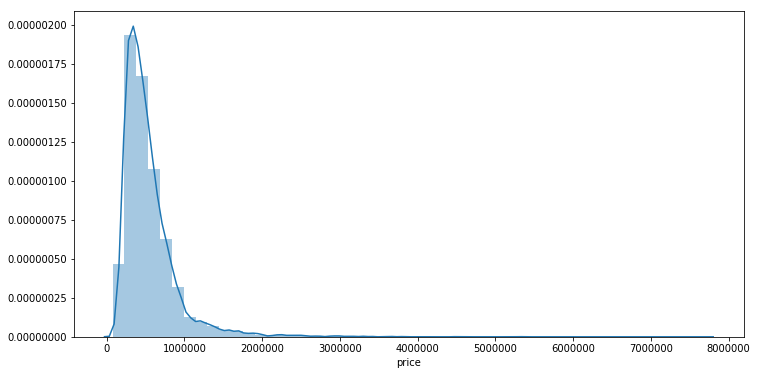

In [6]:
# example of distplot (histogram function in seaborn)

# this code creates a figure, and sets 'ax' as a variable with format parameters
fig, ax = plt.subplots(figsize = (12,6))

# creates a distplot and uses the 'ax' parameters set above
sns.distplot(data['price'], ax = ax)

The distri

In [7]:
data['price'].skew()

4.021715573048684

In [8]:
data['price'].kurt()

34.522444410072566

A log-transform on the prices will correct some of the skewness and kurtosis, and help to better interpret correlations.

Also, this exercise will help introduce Numpy(np) another helpful library that helps with more advanced calculations such as matrix algebra and log functions.

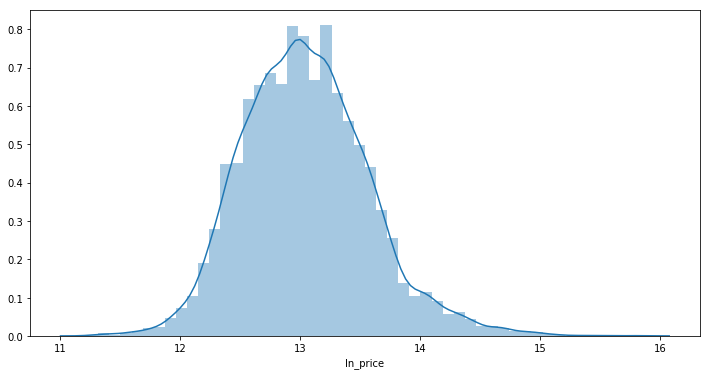

In [9]:
# importing numpy to access the log function
import numpy as np

# copying the price values to a new list
ln_price = data['price'].copy()

# taking the log of the price values
ln_price = np.log(ln_price)

# creating a new column 'ln_price' and filling it with the list we just created
data['ln_price'] = ln_price

# creates distplot with ln_price
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(data['ln_price'], ax = ax)

In [10]:
data['ln_price'].skew()

0.4289692719234486

In [11]:
data['ln_price'].kurt()

0.6925110496469422

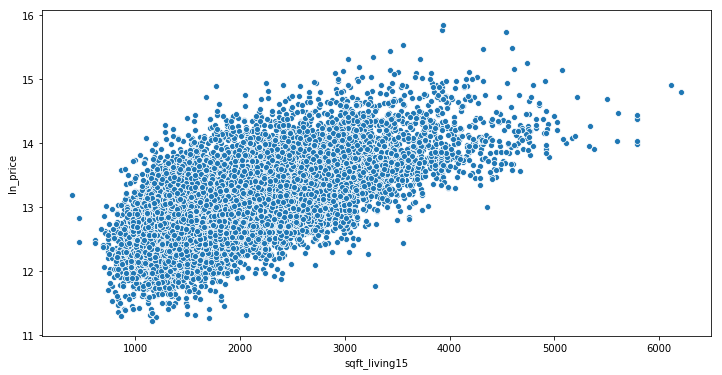

In [12]:
# example of a scatterplot in seaborn
fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(x=data['sqft_living15'], y=data['ln_price'], ax = ax)

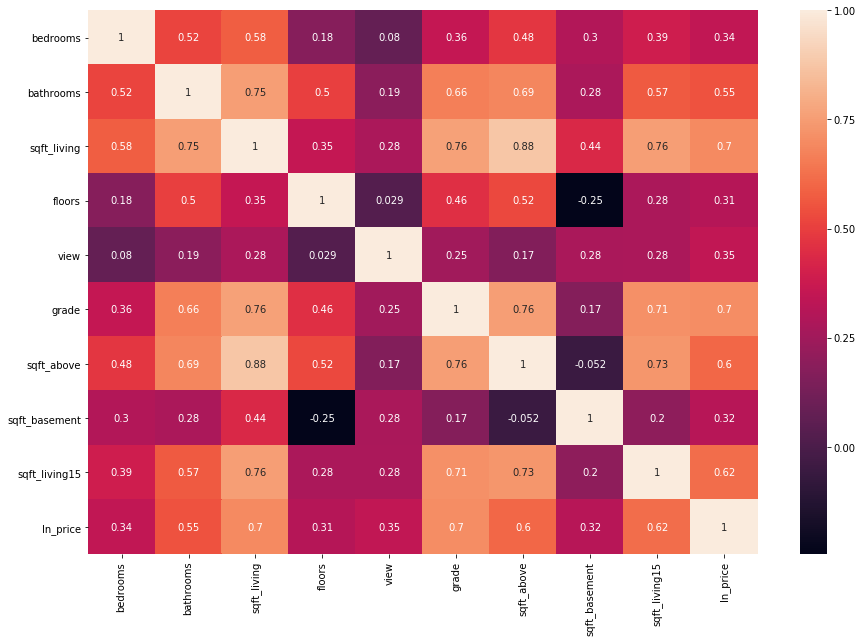

In [13]:
# creating a list of correlation coefficients (without price variable) 
corr_data = data.drop(columns = ['price']).corr()

# creating another list of only correlations of variables highly correlated with ln_price
best_corr = corr_data.index[abs(corr_data["ln_price"])>0.3]


# visualizing correlations using a heatmap from seaborn. annot labels the visual with the correlation values
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(data[best_corr].corr(), annot = True, ax = ax)